# The Daily Show with Jon Stewart Analysis

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import pandas as pd
import seaborn as sns
from textblob import TextBlob
import statsmodels.formula.api as smf

plt.rcParams['figure.figsize'] = (20,6)

from bokeh.plotting import output_notebook, show
output_notebook(hide_banner=True)

from IPython.display import display, HTML
def printb(*args):
    s = " ".join([str(x) for x in args])
    display(HTML('<strong>%s</strong>' % s))

hover_cols = ['air_date', 'episode_number', 'title', 'views']
    
from lib.analysis_utils import plot_interactive_timeseries
from analysis_utils import create_df

In [2]:
episodes = create_df()
post_2012_episodes = episodes[episodes.air_date > '2012']

## Distribution of Rating and Rating Count

Number of episodes with null rating (< 5 ratings)

In [3]:
episodes.rating.isnull().sum()

1096

In [4]:
episodes[['rating', 'rating_count']].describe().T

,count,mean,std,min,25%,50%,75%,max
rating,1923.0,6.947946,0.895543,2.8,6.4,7.1,7.6,9.5
rating_count,1923.0,13.538742,6.731581,5.0,9.0,13.0,17.0,213.0


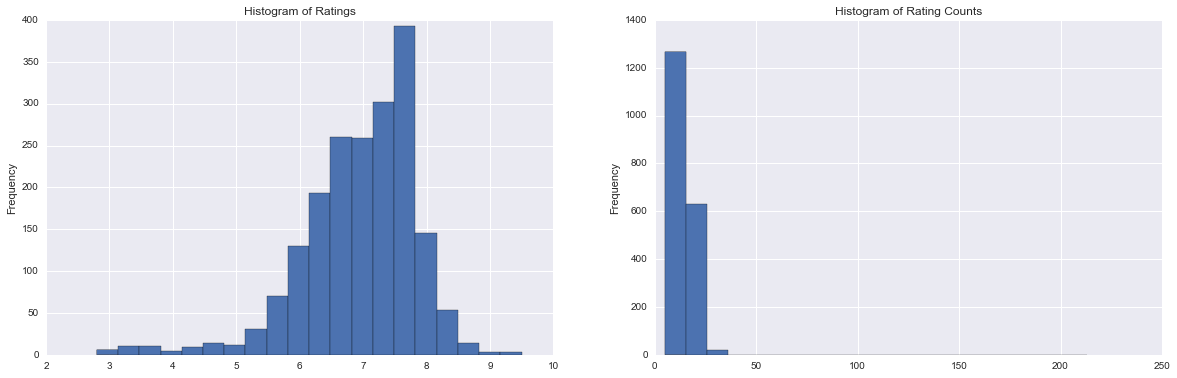

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2)

episodes.rating.plot(kind='hist', bins=20, ax=ax1, title="Histogram of Ratings")
episodes.rating_count.plot(kind='hist', bins=20, ax=ax2, title="Histogram of Rating Counts")

## Ratings over Time

In [6]:
p = plot_interactive_timeseries(x='air_date', y='rating', data=episodes, 
                                title="Ratings per Episode",
                               hover_cols=hover_cols + ['rating', 'rating_count'])
show(p)

## Ratings Count over Time

In [7]:
p = plot_interactive_timeseries(x='air_date', y='rating_count', data=episodes[episodes.air_date < "2015-08-07"], 
                                title="Number of Ratings per Episode",
                                hover_cols=hover_cols + ['rating', 'rating_count'])
show(p)

## Ratings vs Rating Count

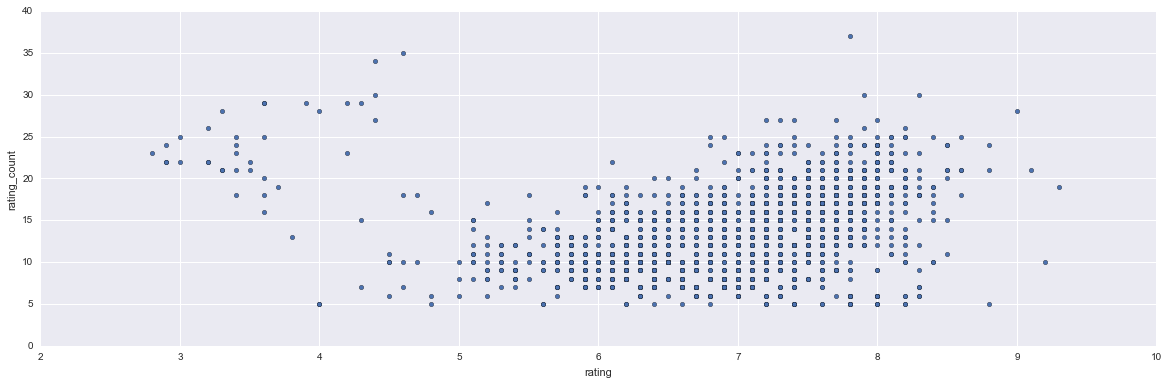

In [8]:
episodes[episodes.air_date < "2015-08-07"].plot(kind='scatter', x='rating', y='rating_count')

## Views over Time

In [9]:
p = plot_interactive_timeseries(x='air_date', y='views', data=episodes, 
                                title="Views per Episode", hover_cols=hover_cols)
show(p)

In [10]:
p = plot_interactive_timeseries(x='air_date', y='views', data=post_2012_episodes, 
                                title="Views per Episode", hover_cols=hover_cols)
show(p)

In [11]:
weekly_views = post_2012_episodes.set_index('air_date').resample('W').mean()[['views']].reset_index()
p = plot_interactive_timeseries(x='air_date', y='views', data=weekly_views, 
                                title="Average Weekly Views")
show(p)

In [12]:
monthly_views = post_2012_episodes.set_index('air_date').resample('M').mean()[['views']].reset_index()
p = plot_interactive_timeseries(x='air_date', y='views', data=monthly_views, 
                                title="Average Monthly Views")
show(p)

## Views vs Rating

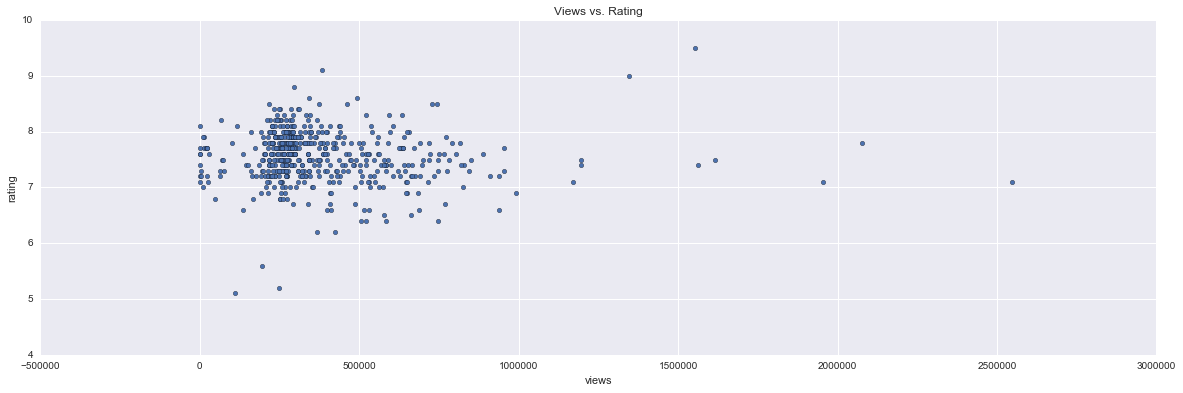

In [13]:
post_2012_episodes[post_2012_episodes.views > 0].plot(kind='scatter', x='views', y='rating', title='Views vs. Rating')